# Mini-Project by Siddhi Jhanwar (22112334)

I have taken my data from Kaggle and here is the link to that dataset (https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data?select=acs2017_county_data.csv).

In [176]:
# Importing the required libraries
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt             #visualization
import seaborn as sns                       #visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score


# Loading the CSV file into a pandas dataframe
df = pd.read_csv("C:/Users/siddh/OneDrive/Documents/Data Science/acs2017_county_data.csv")
df

CountyId        State               County  TotalPop    Men   Women  \
0         1001      Alabama       Autauga County     55036  26899   28137   
1         1003      Alabama       Baldwin County    203360  99527  103833   
2         1005      Alabama       Barbour County     26201  13976   12225   
3         1007      Alabama          Bibb County     22580  12251   10329   
4         1009      Alabama        Blount County     57667  28490   29177   
...        ...          ...                  ...       ...    ...     ...   
3215     72145  Puerto Rico  Vega Baja Municipio     54754  26269   28485   
3216     72147  Puerto Rico    Vieques Municipio      8931   4351    4580   
3217     72149  Puerto Rico   Villalba Municipio     23659  11510   12149   
3218     72151  Puerto Rico    Yabucoa Municipio     35025  16984   18041   
3219     72153  Puerto Rico      Yauco Municipio     37585  18052   19533   

      Hispanic  White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  \
0          2.7   75.4   18.9     0.3  ...   0.6          1.3         2.5   
1          4.4   83.1    9.5     0.8  ...   0.8          1.1         5.6   
2          4.2   45.7   47.8     0.2  ...   2.2          1.7         1.3   
3          2.4   74.6   22.0     0.4  ...   0.3          1.7         1.5   
4          9.0   87.4    1.5     0.3  ...   0.4          0.4         2.1   
...        ...    ...    ...     ...  ...   ...          ...         ...   
3215      96.7    3.1    0.1     0.0  ...   1.4          0.6         0.9   
3216      95.7    4.0    0.0     0.0  ...   5.0          0.0         1.7   
3217      99.7    0.2    0.1     0.0  ...   2.1          0.0         2.8   
3218      99.9    0.1    0.0     0.0  ...   1.4          1.8         0.1   
3219      99.8    0.2    0.0     0.0  ...   1.7          0.1         5.0   

      MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
0            25.8     24112         74.1        20.2           5.6   
1            27.0     89527         80.7        12.9           6.3   
2            23.4      8878         74.1        19.1           6.5   
3            30.0      8171         76.0        17.4           6.3   
4            35.0     21380         83.9        11.9           4.0   
...           ...       ...          ...         ...           ...   
3215         31.6     14234         76.2        19.3           4.3   
3216         14.9      2927         40.7        40.9          18.4   
3217         28.4      6873         59.2        30.2          10.4   
3218         30.5      7878         62.7        30.9           6.3   
3219         24.4      8995         66.4        28.7           5.0   

      FamilyWork  Unemployment  
0            0.1           5.2  
1            0.1           5.5  
2            0.3          12.4  
3            0.3           8.2  
4            0.1           4.9  
...          ...           ...  
3215         0.2          16.8  
3216         0.0          12.8  
3217         0.2          24.8  
3218         0.0          25.4  
3219         0.0          24.0  

[3220 rows x 37 columns]

In [125]:
df1 = pd.read_excel("C:/Users/siddh/OneDrive/Documents/Data Science/IDS CIA 3.xlsx", sheet_name='Sheet2')
df1 = df1.drop(52)
df1

States  TotalPop1  Unemployment1  Black1  IncomeErr1  \
0                Alabama    4850771          604.6  1921.1      168384   
1                 Alaska     738565          280.0    34.2      159524   
2                Arizona    6809946          146.5    27.2       32399   
3               Arkansas    2977944          546.9  1209.9      214450   
4             California   38982847          479.4   170.8      129479   
5               Colorado    5436519          370.8    94.9      256956   
6            Connecticut    3594478           54.2    51.8       11413   
7               Delaware     943732           19.3    60.3        3853   
8   District of Columbia     672391            8.0    46.9        1075   
9                Florida   20278447          520.3   951.5      146199   
10               Georgia   10201635         1280.5  4475.0      544514   
11                Hawaii    1421658           20.6     4.0       18811   
12                 Idaho    1657375          247.4    16.6      167936   
13              Illinois   12854526          674.4   525.1      275146   
14               Indiana    6614418          501.0   244.6      223912   
15                  Iowa    3118102          385.7   136.5      296079   
16                Kansas    2903820          419.0   183.6      448058   
17              Kentucky    4424376          920.7   437.9      393865   
18             Louisiana    4663461          503.8  2033.6      196662   
19                 Maine    1330158           92.8    12.4       30116   
20              Maryland    5996079          146.9   476.1       58524   
21         Massachusetts    6789319           81.8    79.8       34249   
22              Michigan    9925568          632.5   321.6      141069   
23             Minnesota    5490726          344.0   141.8      221377   
24           Mississippi    2986220          820.6  3390.3      265937   
25              Missouri    6075300          693.0   409.6      316423   
26               Montana    1029862          253.4    12.4      267284   
27              Nebraska    1893921          264.8    76.1      412061   
28                Nevada    2887725          125.7    37.2      108808   
29         New Hampshire    1331848           45.4    10.2       22842   
30            New Jersey    8960161          149.5   238.1       31760   
31            New Mexico    2084828          249.7    41.4      109483   
32              New York   19798228          407.8   360.3      104898   
33        North Carolina   10052564          796.5  2016.3      231061   
34          North Dakota     745475          144.6    46.5      302876   
35                  Ohio   11609756          535.4   359.1      173930   
36              Oklahoma    3896251          450.7   260.1      211323   
37                Oregon    4025127          268.4    26.5      102720   
38          Pennsylvania   12790505          404.1   302.0      102250   
39           Puerto Rico    3468963         1467.5     3.8      126006   
40          Rhode Island    1056138           29.3    15.0       10404   
41        South Carolina    4893444          403.6  1632.6       97783   
42          South Dakota     855444          318.2    36.7      278978   
43             Tennessee    6597381          697.7   689.0      256196   
44                 Texas   27419612         1531.2  1561.1     1230041   
45                  Utah    2993941          126.6    12.6      144237   
46               Vermont     624636           63.4    11.8       33645   
47              Virginia    8365952          802.5  2446.9      483996   
48            Washington    7169967          261.4    48.4       93034   
49         West Virginia    1836843          443.5   126.6      178110   
50             Wisconsin    5763217          329.1   114.7      129453   
51               Wyoming     583200           98.5    13.4      106757   

    VotingAgeCitizen1  Poverty1  ChildPoverty1  
0             3651914    1403.6         2054.8

## ABOUT THE DATA

In [185]:
# To identify the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountyId          3220 non-null   int64  
 1   State             3220 non-null   object 
 2   County            3220 non-null   object 
 3   TotalPop          3220 non-null   int64  
 4   Men               3220 non-null   int64  
 5   Women             3220 non-null   int64  
 6   Hispanic          3220 non-null   float64
 7   White             3220 non-null   float64
 8   Black             3220 non-null   float64
 9   Native            3220 non-null   float64
 10  Asian             3220 non-null   float64
 11  Pacific           3220 non-null   float64
 12  VotingAgeCitizen  3220 non-null   int64  
 13  Income            3220 non-null   int64  
 14  IncomeErr         3220 non-null   int64  
 15  IncomePerCap      3220 non-null   int64  
 16  IncomePerCapErr   3220 non-null   int64  


In [178]:
# Getting the number of instances and features
df.shape

(3220, 37)

In [179]:
# Getting the dimensions of the data frame
df.ndim

2

<hr>

### PRE-PROCESSING

In [180]:
# Checking if the dataset contain any NA values
df.isna().sum()

CountyId            0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        1
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [181]:
# Impute missing values with mean
df['ChildPoverty'].fillna(df['ChildPoverty'].mean(), inplace=True)

In [132]:
# Remove unnecessary columns
df = df.drop(columns=["State", "County", "CountyId"])

In the code df.describe().T, the T is used to transpose the DataFrame. Transposing a DataFrame swaps the rows and columns, effectively converting the columns into rows and vice versa.

In [133]:
# Performing a 5 number summary (min, lower quartile, median, upper quartile, max)
df.describe().T

count           mean            std      min        25%  \
TotalPop          3220.0  100768.127329  324499.589466     74.0  11213.500   
Men               3220.0   49587.810559  159321.182902     39.0   5645.500   
Women             3220.0   51180.316770  165216.389158     35.0   5553.500   
Hispanic          3220.0      11.296584      19.342522      0.0      2.100   
White             3220.0      74.920186      23.056700      0.0     63.500   
Black             3220.0       8.681957      14.333571      0.0      0.600   
Native            3220.0       1.768416       7.422946      0.0      0.100   
Asian             3220.0       1.289379       2.716191      0.0      0.200   
Pacific           3220.0       0.083416       0.709277      0.0      0.000   
VotingAgeCitizen  3220.0   71309.522981  210869.128545     59.0   8442.250   
Income            3220.0   48994.966770   13877.178398  11680.0  40622.000   
IncomeErr         3220.0    3138.616770    2405.786950    262.0   1729.750   
IncomePerCap      3220.0   25657.033230    6667.520452   5943.0  21568.000   
IncomePerCapErr   3220.0    1514.442547    1156.708587    129.0    832.000   
Poverty           3220.0      16.780776       8.309360      2.4     11.475   
ChildPoverty      3220.0      23.040634      11.890087      0.0     14.900   
Professional      3220.0      31.479814       6.523912     11.4     27.200   
Service           3220.0      18.214286       3.742308      0.0     15.800   
Office            3220.0      21.878944       3.167228      4.8     19.900   
Construction      3220.0      12.592360       4.143504      0.0      9.800   
Production        3220.0      15.835745       5.808383      0.0     11.500   
Drive             3220.0      79.630963       7.663900      4.6     77.300   
Carpool           3220.0       9.851646       2.963054      0.0      8.000   
Transit           3220.0       0.938975       3.072571      0.0      0.100   
Walk              3220.0       3.244472       3.891510      0.0      1.400   
OtherTransp       3220.0       1.598696       1.678232      0.0      0.800   
WorkAtHome        3220.0       4.736894       3.073484      0.0      2.900   
MeanCommute       3220.0      23.474534       5.687241      5.1     19.600   
Employed          3220.0   47092.950621  155815.934036     39.0   4573.000   
PrivateWork       3220.0      74.863323       7.647916     31.1     71.200   
PublicWork        3220.0      17.086118       6.390868      4.4     12.700   
SelfEmployed      3220.0       7.772733       3.855454      0.0      5.200   
FamilyWork        3220.0       0.278820       0.448073      0.0      0.100   
Unemployment      3220.0       6.665590       3.772612      0.0      4.475   

                      50%        75%         max  
TotalPop          25847.5  66608.250  10105722.0  
Men               12879.0  33017.250   4979641.0  
Women             12993.5  33593.750   5126081.0  
Hispanic              4.1     10.000       100.0  
White                83.6     92.800       100.0  
Black                 2.0      9.500        86.9  
Native                0.3      0.600        90.3  
Asian                 0.6      1.200        41.8  
Pacific               0.0      0.100        33.7  
VotingAgeCitizen  19699.0  50365.750   6218279.0  
Income            47636.5  55476.000    129588.0  
IncomeErr          2587.0   3802.000     41001.0  
IncomePerCap      25139.0  28997.000     69529.0  
IncomePerCapErr    1225.0   1802.500     16145.0  
Poverty              15.4     19.800        65.2  
ChildPoverty         21.5     28.600        83.6  
Professional         30.5     34.900        69.0  
Service              17.8     20.200        46.4  
Office               22.1     23.900        37.2  
Construction         12.1     14.800        36.4  
Production           15.4     19.500        48.7  
Drive                81.0     84.100        97.2  
Carpool               9.5     11.300        29.3  
Transit               0.3      0.800        61.8  
Walk         

The fit_transform() method is applied to the selected columns of the DataFrame using the StandardScaler. It computes the mean and standard deviation of each column and scales the values accordingly. The scaled values are then assigned back to the respective columns in the DataFrame.

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Apply fit_transform on the selected columns and assign the scaled values back to the dataframe
df[["TotalPop", "Men", "Women","White","Employed", "VotingAgeCitizen","Income","IncomeErr","IncomePerCap","IncomePerCapErr","Drive", "PrivateWork"]] = StandardScaler().fit_transform(df[["TotalPop", "Men", "Women", "Employed", "VotingAgeCitizen","Income","IncomeErr","IncomePerCap","IncomePerCapErr","Drive", "PrivateWork","White"]])
df.T

0          1          2          3          4     \
TotalPop          -0.140953   0.316203  -0.229827  -0.240987  -0.132844   
Men               -0.142431   0.313498  -0.223557  -0.234386  -0.132444   
Women             -0.139495   0.318739  -0.235820  -0.247298  -0.133199   
Hispanic           2.700000   4.400000   4.200000   2.400000   9.000000   
White             -0.147511   0.272377  -0.245295  -0.249833  -0.165047   
Black             18.900000   9.500000  47.800000  22.000000   1.500000   
Native             0.300000   0.800000   0.200000   0.400000   0.300000   
Asian              0.900000   0.700000   0.600000   0.000000   0.100000   
Pacific            0.000000   0.000000   0.000000   0.000000   0.000000   
VotingAgeCitizen   0.455641   0.257083  -1.126266  -0.402952  -0.114088   
Income            -0.124975  -0.744411  -0.244289   0.121552  -0.211447   
IncomeErr          0.325054   0.556060  -1.214438  -0.711924  -0.545420   
IncomePerCap       0.440592  -0.673950  -0.619477   0.323863  -0.574514   
IncomePerCapErr    0.831173   0.661520   0.491867   0.883374   0.935575   
Poverty           13.700000  11.800000  27.200000  15.200000  15.600000   
ChildPoverty      20.100000  16.100000  44.900000  26.600000  25.400000   
Professional      35.300000  35.700000  25.000000  24.400000  28.500000   
Service           18.000000  18.200000  16.800000  17.600000  12.900000   
Office            23.200000  25.600000  22.600000  19.700000  23.300000   
Construction       8.100000   9.700000  11.500000  15.900000  15.800000   
Production        15.400000  10.800000  24.100000  22.400000  19.500000   
Drive             -0.099823   0.763291  -0.099823   0.148649   1.181770   
Carpool            9.600000   7.600000  11.100000   9.500000  10.200000   
Transit            0.100000   0.100000   0.300000   0.700000   0.100000   
Walk               0.600000   0.800000   2.200000   0.300000   0.400000   
OtherTransp        1.300000   1.100000   1.700000   1.700000   0.400000   
WorkAtHome         2.500000   5.600000   1.300000   1.500000   2.100000   
MeanCommute       25.800000  27.000000  23.400000  30.000000  35.000000   
Employed          -0.143683   0.398729  -0.242086  -0.254451  -0.136582   
PrivateWork        0.020813   0.354825  -1.267516  -0.013889   0.541350   
PublicWork        20.200000  12.900000  19.100000  17.400000  11.900000   
SelfEmployed       5.600000   6.300000   6.500000   6.300000   4.000000   
FamilyWork         0.100000   0.100000   0.300000   0.300000   0.100000   
Unemployment       5.200000   5.500000  12.400000   8.200000   4.900000   

                       5          6          7          8          9     ...  \
TotalPop          -0.278287  -0.248551   0.045489  -0.206113  -0.230893  ...   
Men               -0.276038  -0.252183   0.037698  -0.208842  -0.230550  ...   
Women             -0.280393  -0.244991   0.052991  -0.203433  -0.231171  ...   
Hispanic           0.300000   0.300000   3.600000   2.200000   1.600000  ...   
White             -0.274745  -0.252683   0.001920  -0.209035  -0.238870  ...   
Black             75.600000  44.700000  20.400000  39.300000   5.000000  ...   
Native             1.000000   0.100000   0.200000   0.300000   0.500000  ...   
Asian              0.700000   1.100000   1.000000   1.000000   0.100000  ...   
Pacific            0.000000   0.000000   0.000000   0.000000   0.000000  ...   
VotingAgeCitizen  -1.393869  -0.913077  -0.382628  -0.839852  -0.645330  ...   
Income             0.930145  -0.181930  -0.684962  -0.468783  -0.341986  ...   
IncomeErr         -0.720175  -0.997982  -0.302863  -0.548270  -0.397066  ...   
IncomePerCap       0.726793  -0.494101  -0.623800  -0.267561  -0.138728  ...   
IncomePerCapErr   -0.852305   0.517968   0.700671   0.974725   0.700671  ...   
Poverty           28.500000  24.400000  18.600000  18.800000  16.100000  ...   
ChildPoverty      50.400000  34.800000  26.600000  29.100000  20.000000  ...   
Professional      19.700000  26.90000

### DATA VISUALIZATION

The significance of using a box plot includes:

Visualizing the distribution: The box plot provides a compact representation of the distribution of a dataset. It shows the median (the line in the middle of the box), the interquartile range (the box), and the whiskers (lines extending from the box), which can help identify if the data is skewed, symmetric, or has outliers.

Identifying outliers: Outliers, which are data points that deviate significantly from the rest of the data, are represented as individual points outside the whiskers of the box plot. Box plots allow you to easily identify and analyze the presence of outliers in your data.

Comparing multiple groups: Box plots are particularly useful for comparing the distributions of multiple groups or categories. By plotting multiple box plots side by side, you can compare their medians, quartiles, and ranges, gaining insights into the differences or similarities between the groups.

Assessing skewness and symmetry: Box plots provide visual cues about the skewness and symmetry of the data. For example, if the median is not centered within the box or the whiskers are uneven, it indicates that the data may be skewed or asymmetric.

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment'>

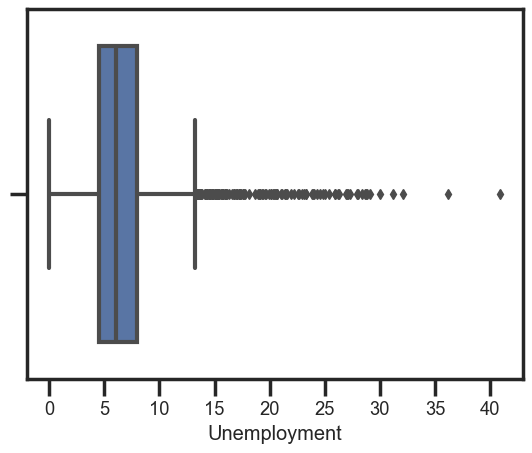

In [135]:
sns.boxplot(df['Unemployment'])

In [136]:
df.drop(df[df['Unemployment'] > 12].index, inplace=True)

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment'>

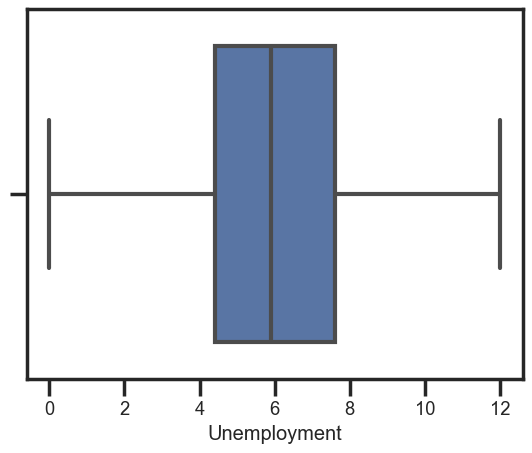

In [137]:
sns.boxplot(df['Unemployment'])

Strip plots are particularly useful for comparing the distribution of a numeric variable across different categories. By plotting data points from different categories side by side, you can visually compare their positions, densities, and variations.
By executing the below code, a strip plot will be generated using the seaborn library, displaying the distribution of unemployment rates (Unemployment1) across different states (States) from the df1 DataFrame.

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


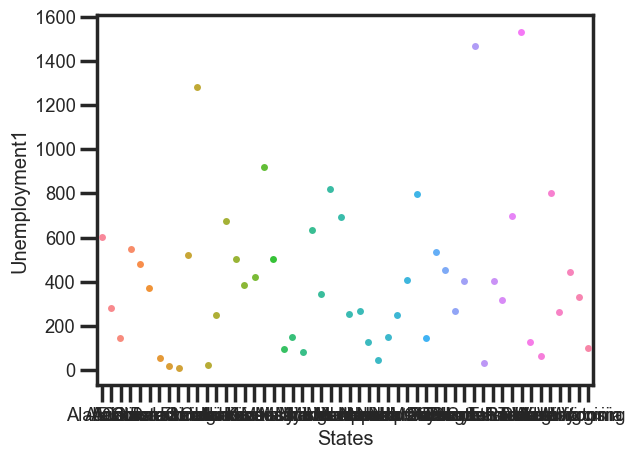

In [138]:
# x axis values
x =df1["States"]
  
# y axis values
y = df1["Unemployment1"]

# plotting strip plot with seaborn
ax = sns.stripplot(x, y)

<AxesSubplot:xlabel='States', ylabel='Unemployment1'>

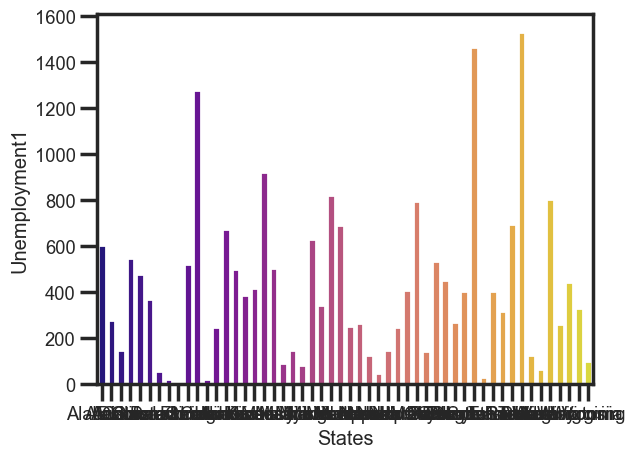

In [139]:
sns.barplot(x = df1["States"], y =df1['Unemployment1'],data = df,  
            palette ='plasma')

The significance of using a PairGrid plot includes:

Visualizing relationships: PairGrid plots are useful for visualizing the relationships between multiple variables in a dataset. Each cell of the grid represents the relationship between two variables, with scatter plots, histograms, or other types of plots.

Hue for differentiation: By specifying the hue parameter, you can differentiate the plot based on a categorical variable (in this case, "States"). Each unique value of the categorical variable will be represented with a different color, allowing you to compare the relationships across different categories.

Diagonal and off-diagonal plots: The map_diag() function specifies the type of graph to be plotted on the diagonal, typically histograms or density plots. The map_offdiag() function specifies the type of graph to be plotted off the diagonal, often scatter plots or other visualizations of the relationship between two variables.

Adding legends: The add_legend() function adds a legend to the plot, providing information about the colors associated with the unique values of the categorical variable (States).

By executing the given code, a PairGrid plot with hue will be generated, showing the relationships between variables in the df1 DataFrame. The diagonal cells will display histograms, the off-diagonal cells will display scatter plots, and the unique values in the "States" column will be differentiated by color with the help of a legend.

<Figure size 3000x2500 with 0 Axes>

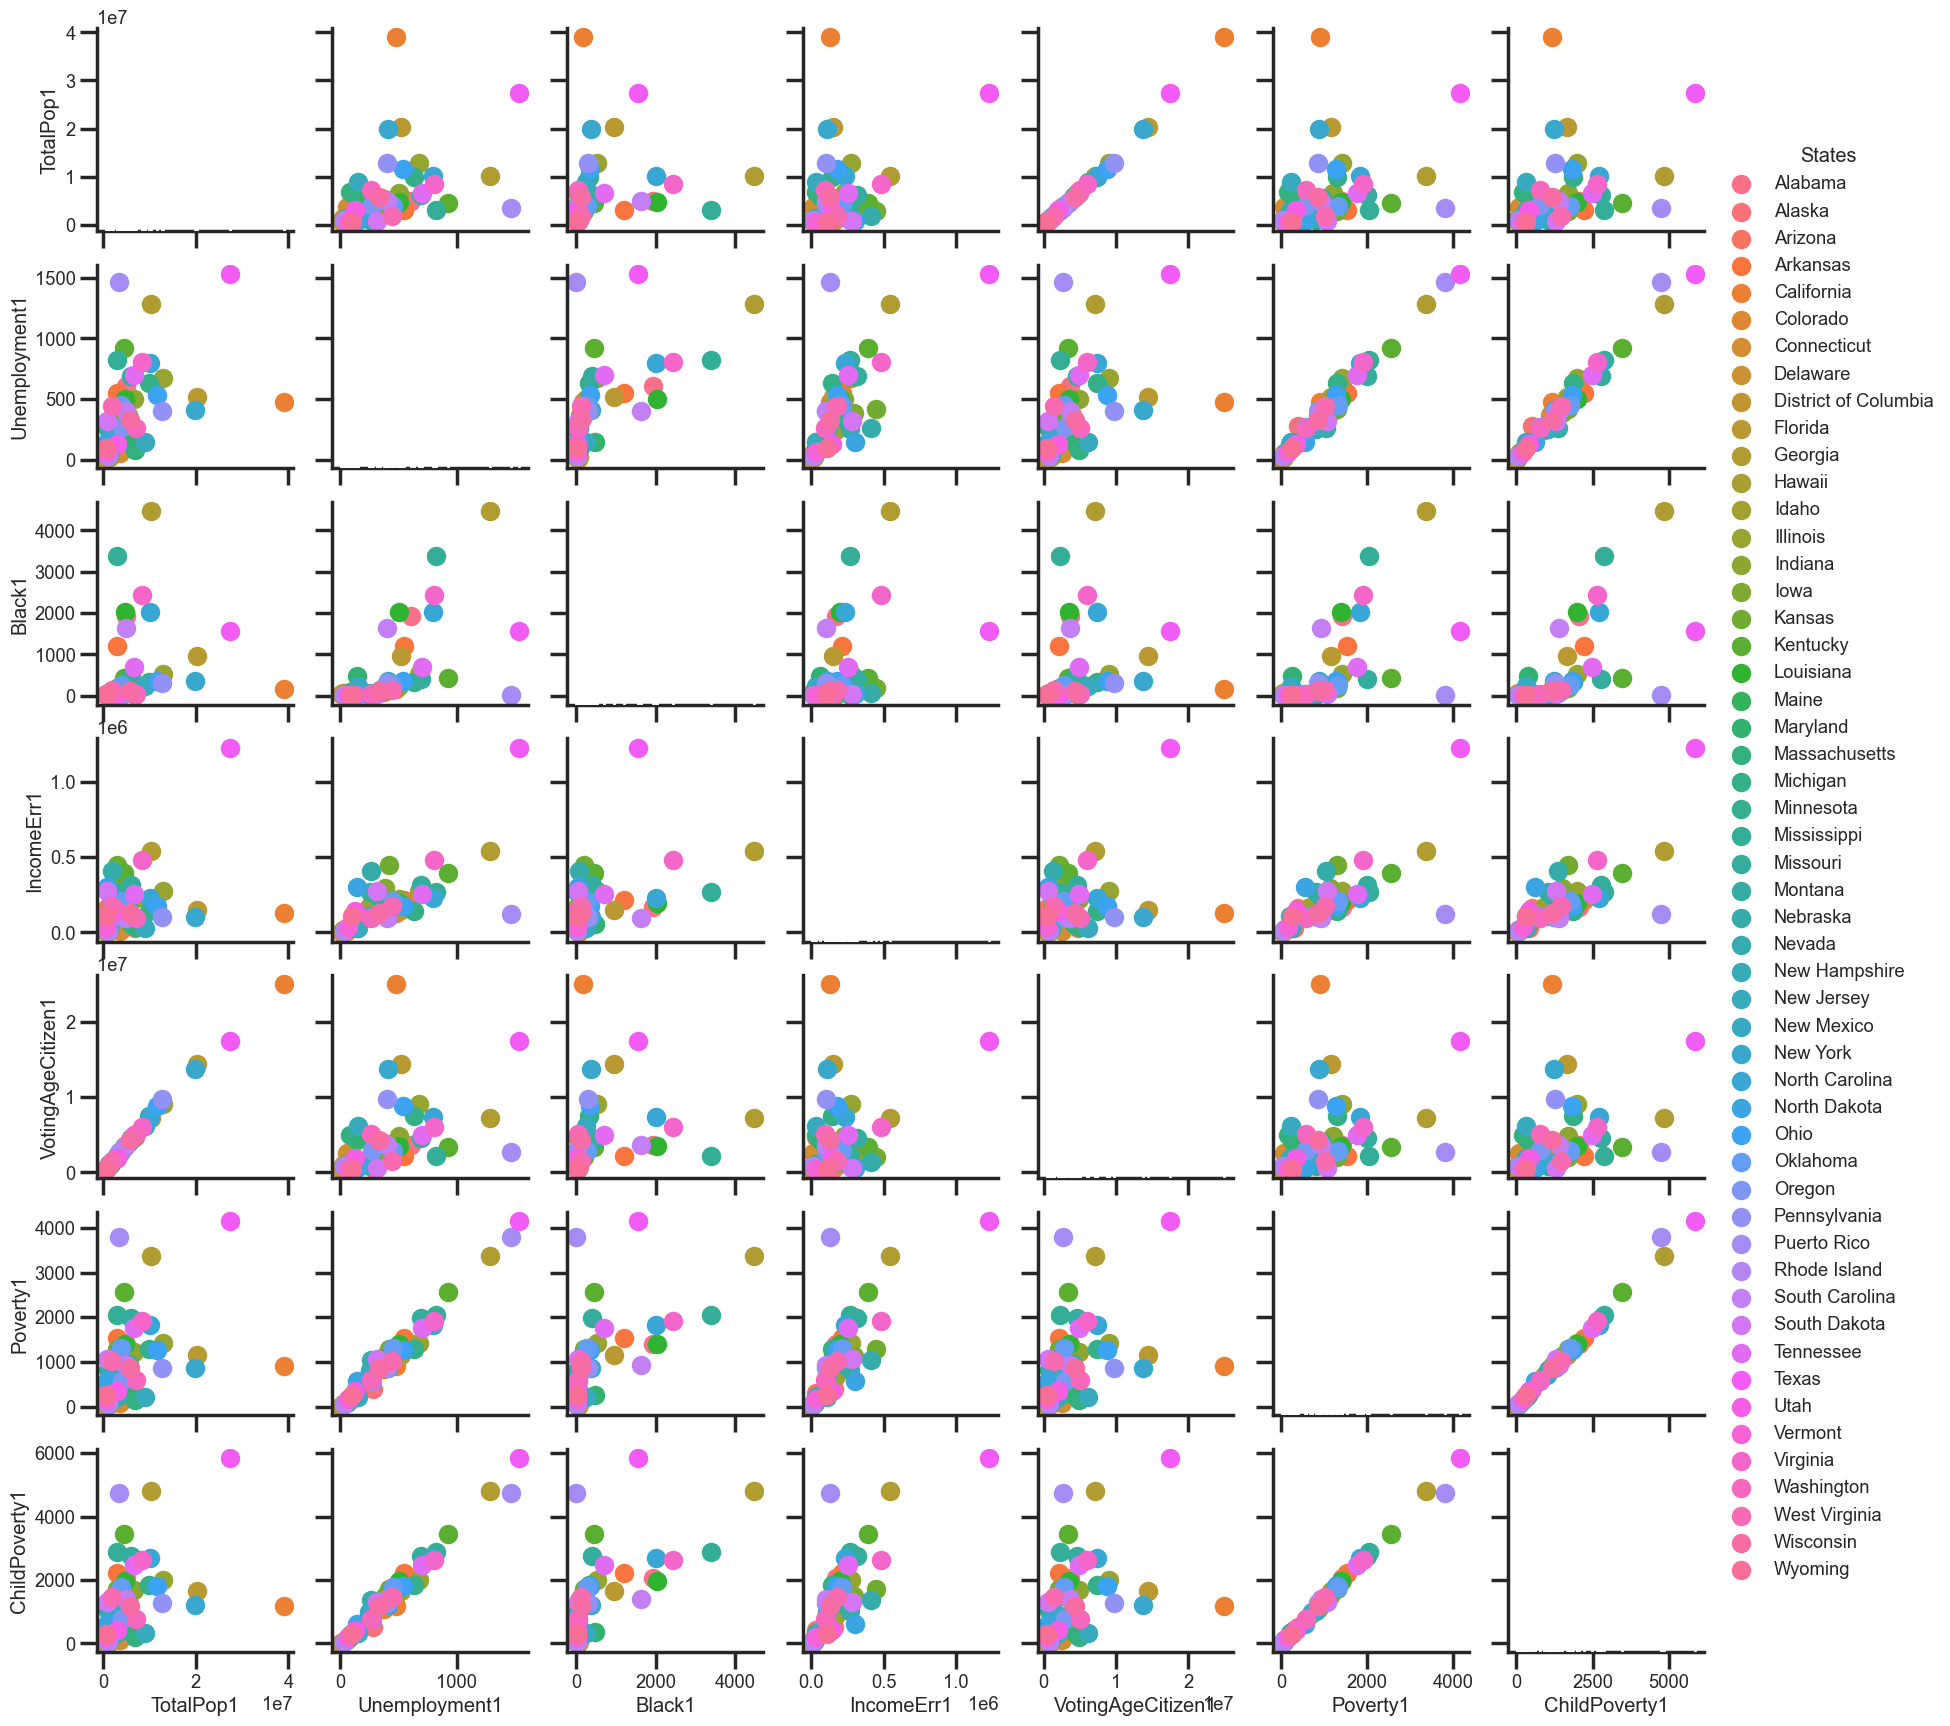

In [158]:
plt.figure(figsize=(30, 25))

# PairGrid object with hue
graph = sns.PairGrid(df1, hue ='States')

# type of graph for diagonal
graph = graph.map_diag(plt.hist)

# type of graph for non-diagonal
graph = graph.map_offdiag(plt.scatter)

# to add legends
graph = graph.add_legend()

# to show
plt.show()

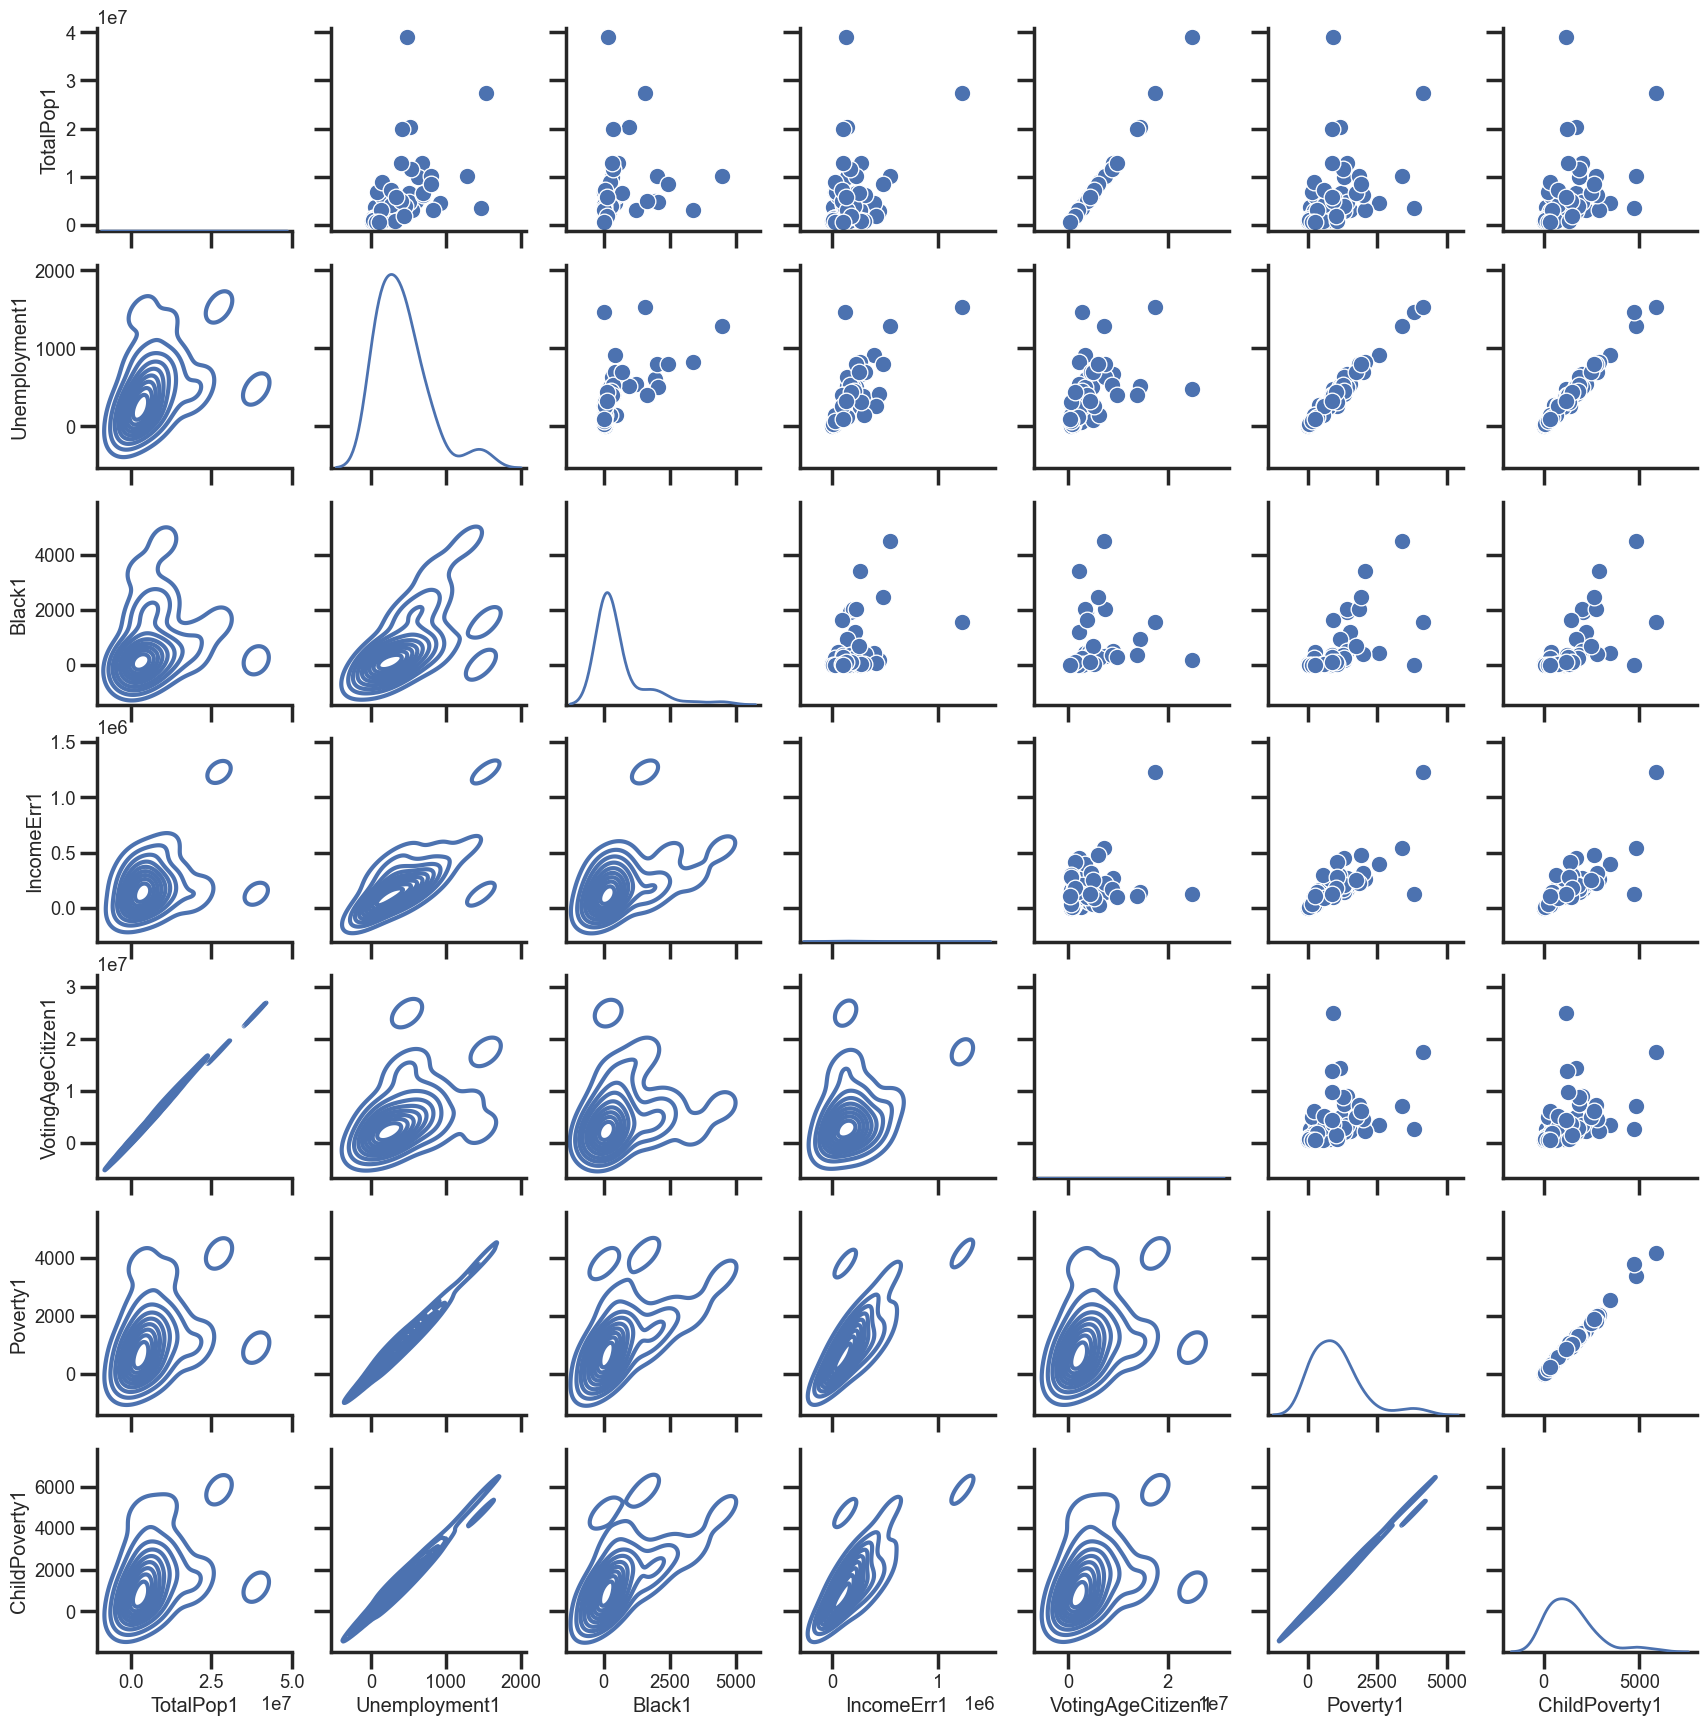

In [161]:
# PairGrid object with hue
graph = sns.PairGrid(df1)

# type of graph for non-diagonal(upper part)
graph = graph.map_upper(sns.scatterplot)

# type of graph for non-diagonal(lower part)
graph = graph.map_lower(sns.kdeplot)

# type of graph for diagonal
graph = graph.map_diag(sns.kdeplot, lw = 2)

# to show
plt.show()

In [159]:
Numerical=df.select_dtypes(exclude='object').columns.tolist()
Numerical

['TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'VotingAgeCitizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

It is to create individual histograms for each numerical feature in the DataFrame. It provides a visual representation of the distribution and frequency of values within each feature. By setting the context, adjusting the figure size, and adding titles and labels, the code aims to enhance the readability and aesthetics of the resulting histogram plots.

C:\Users\siddh\AppData\Local\Temp\ipykernel_31860\2784096146.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


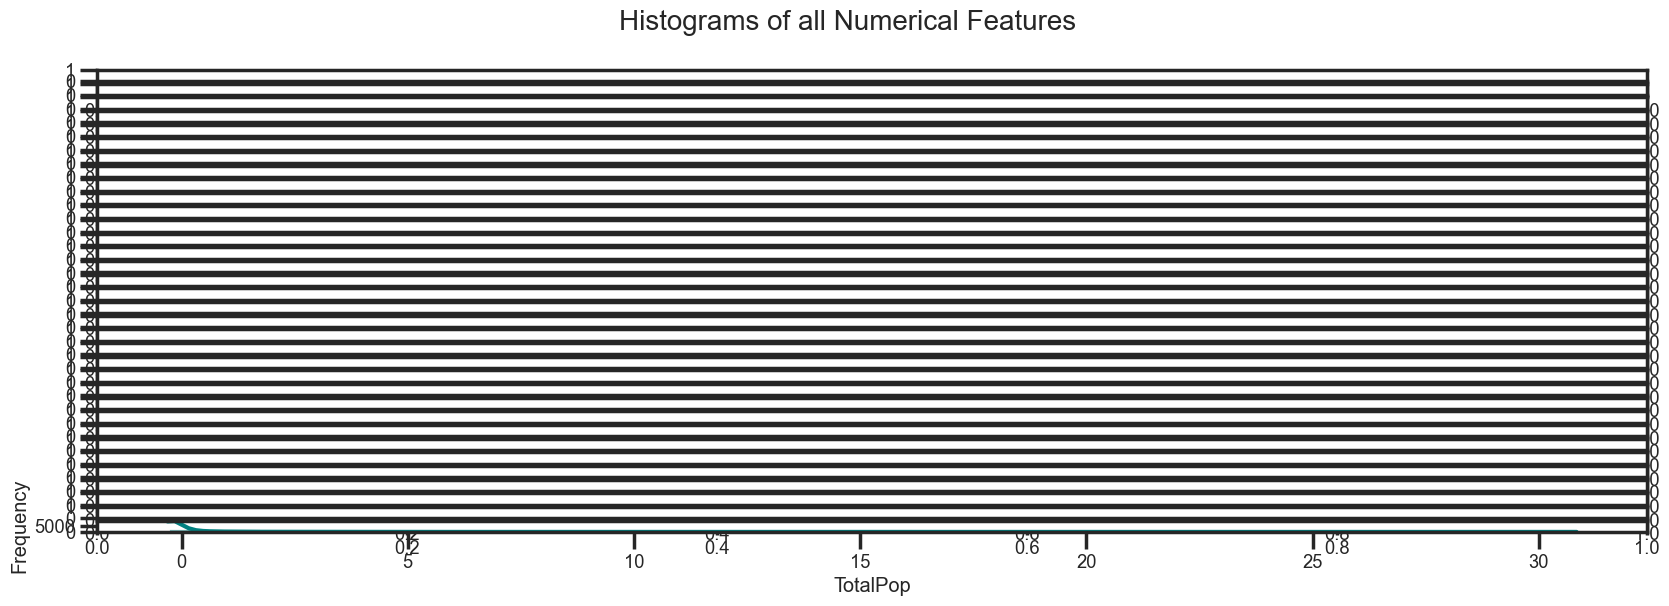

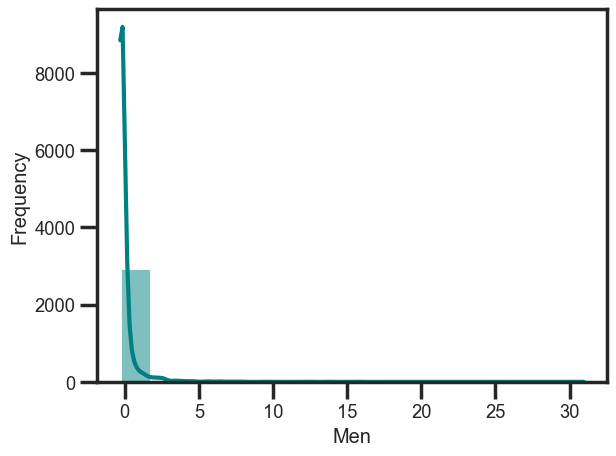

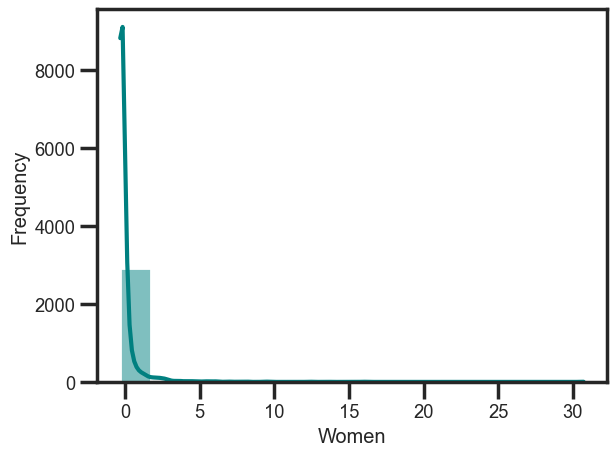

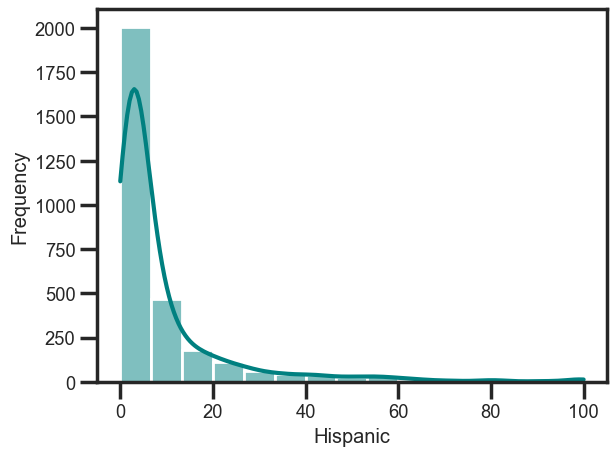

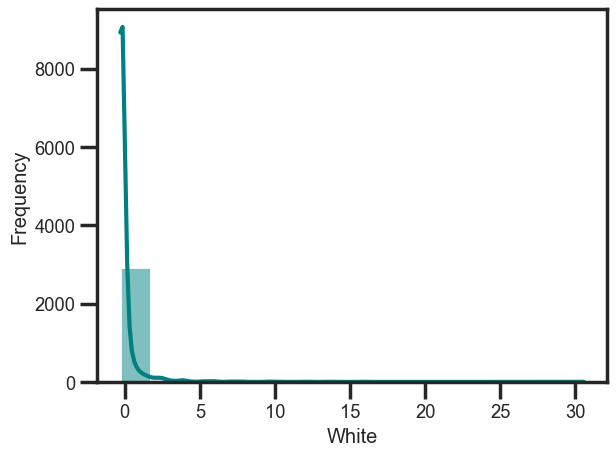

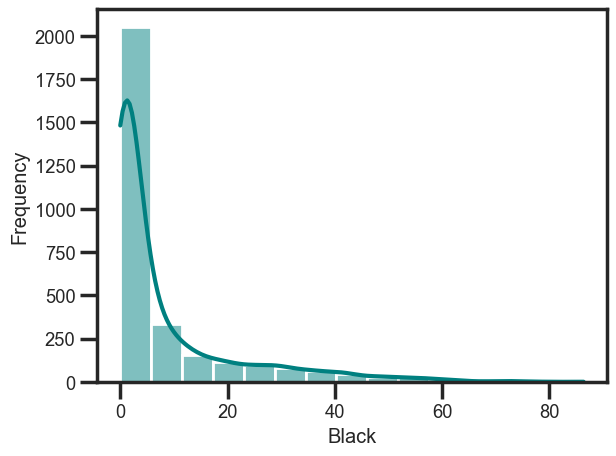

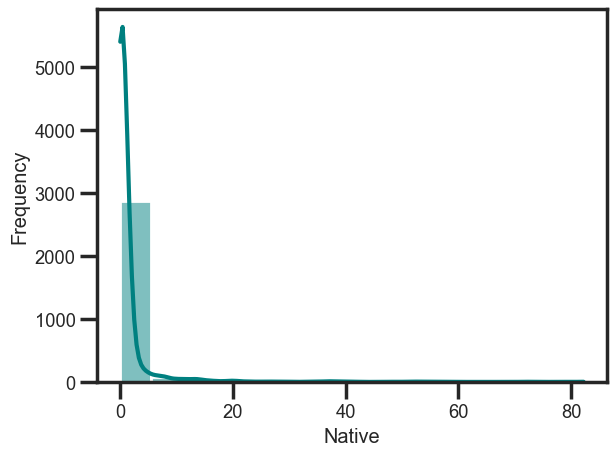

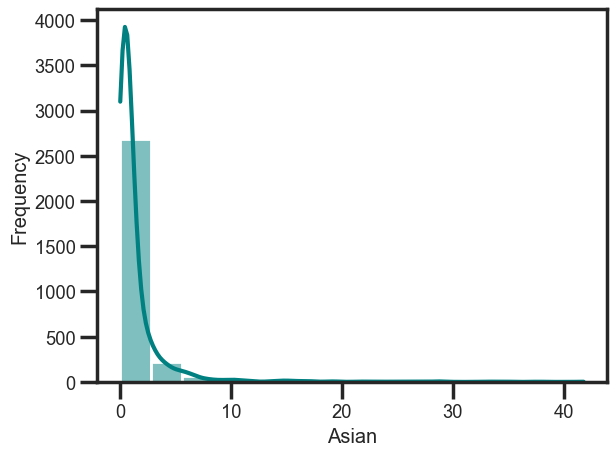

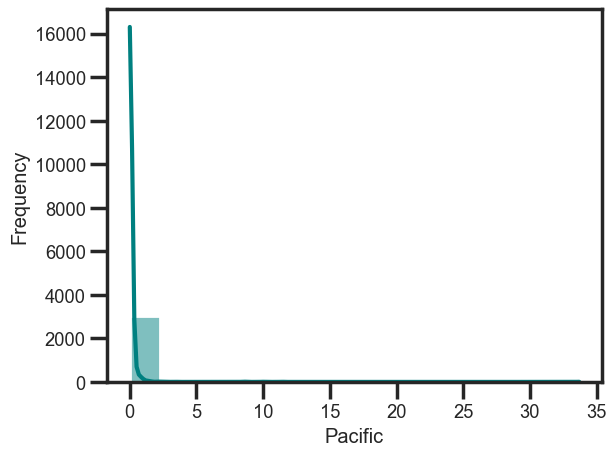

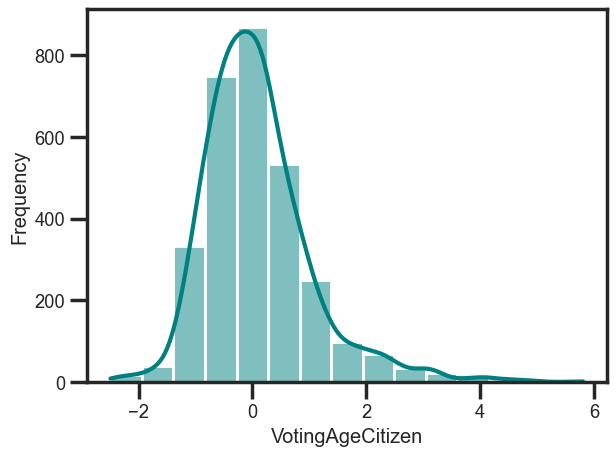

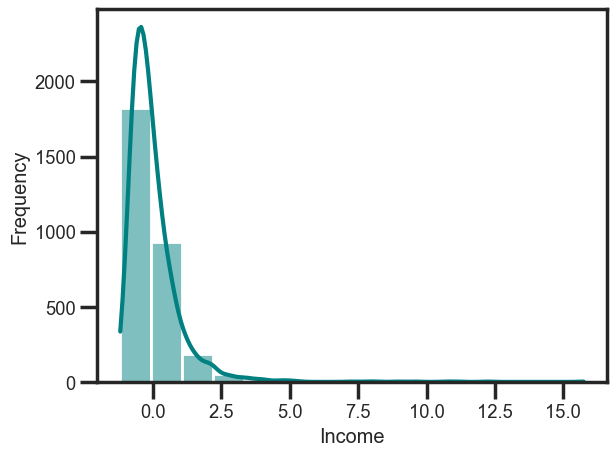

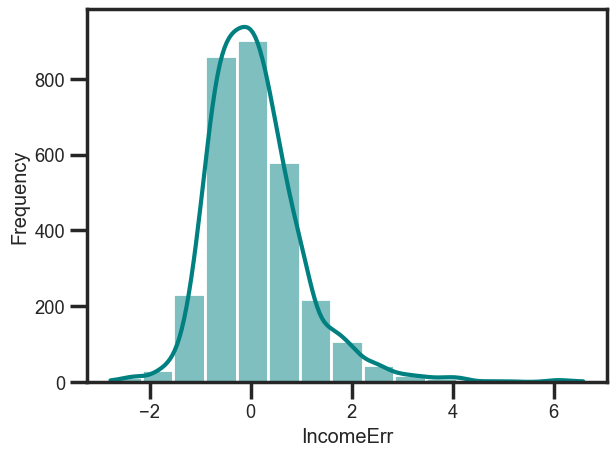

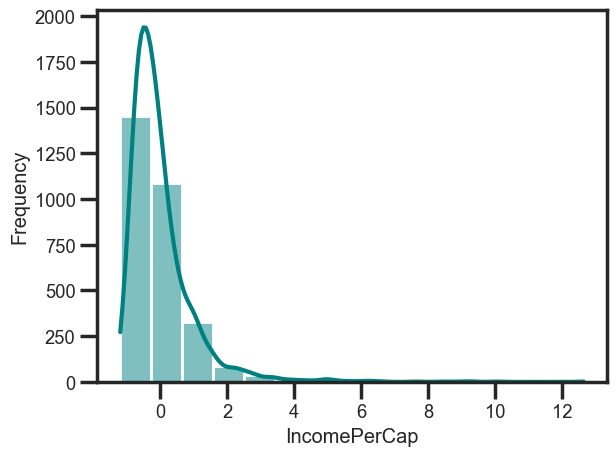

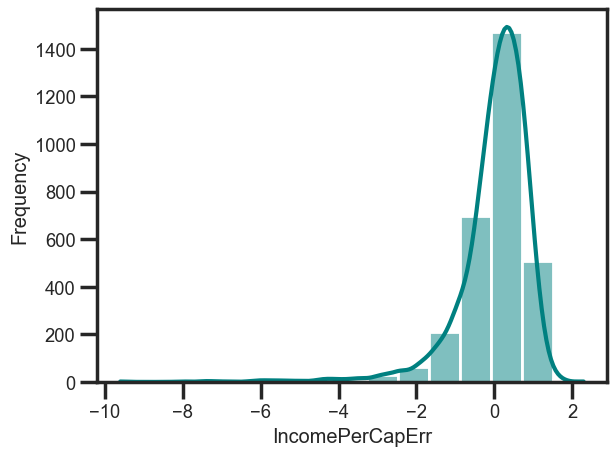

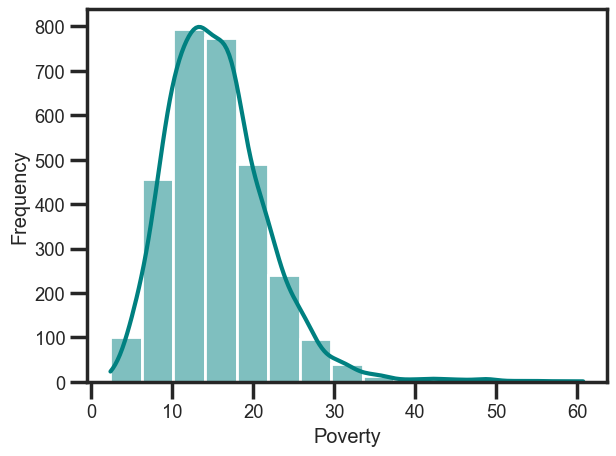

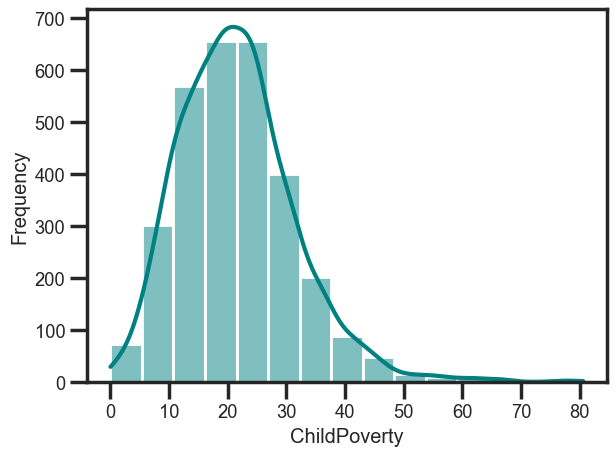

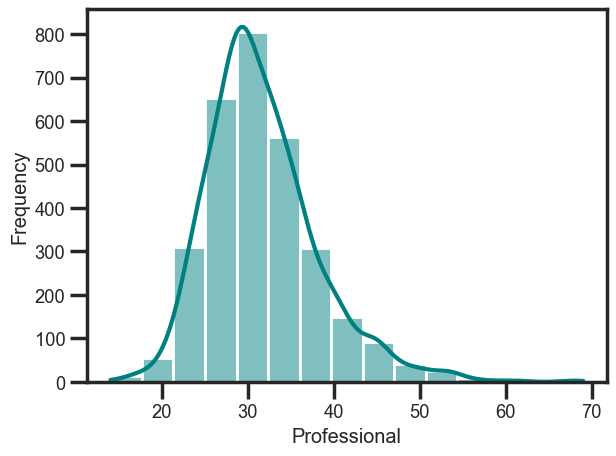

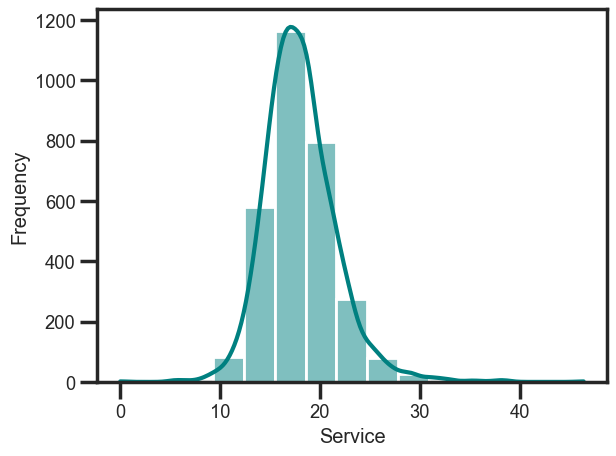

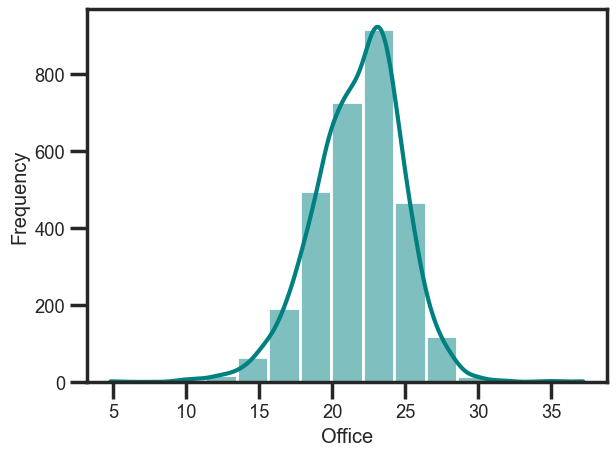

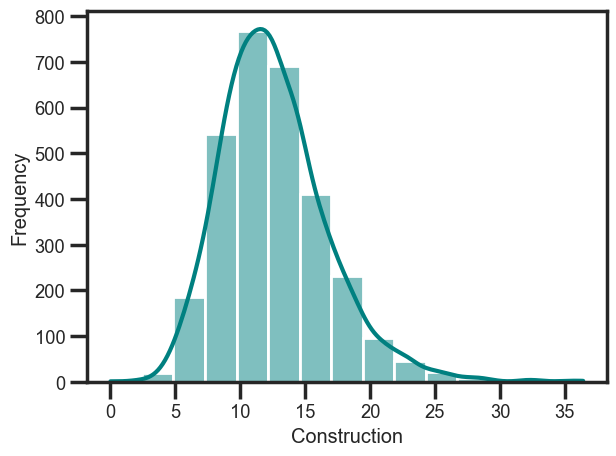

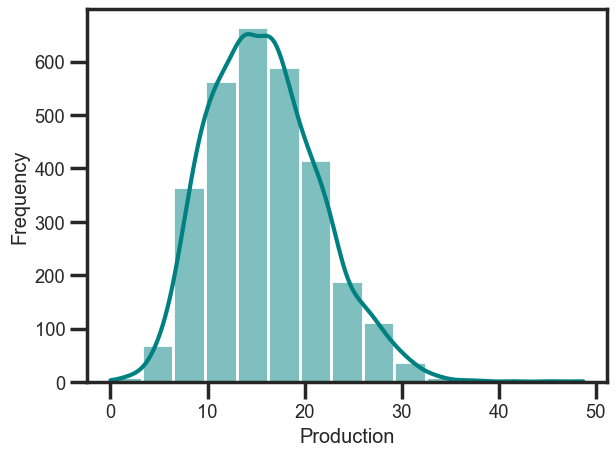

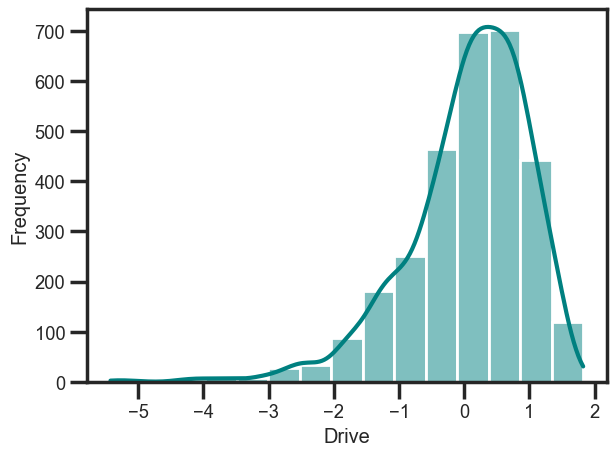

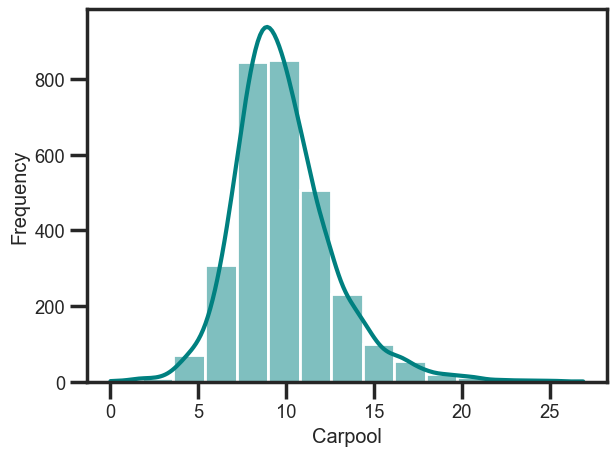

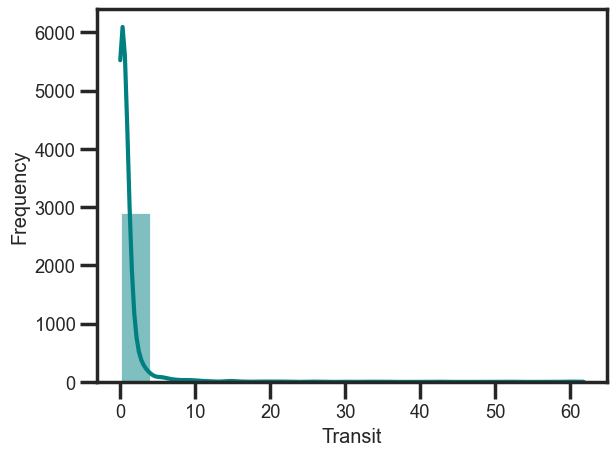

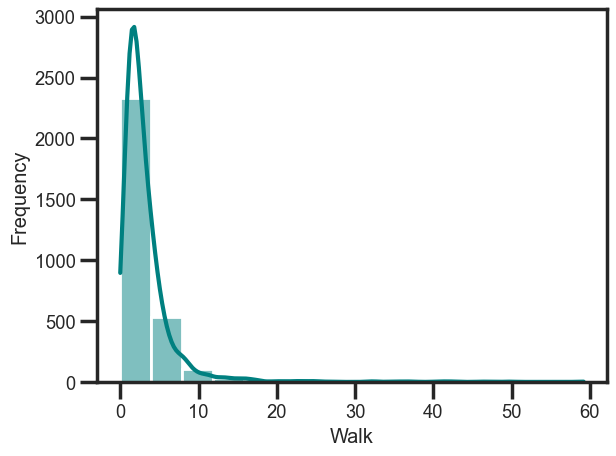

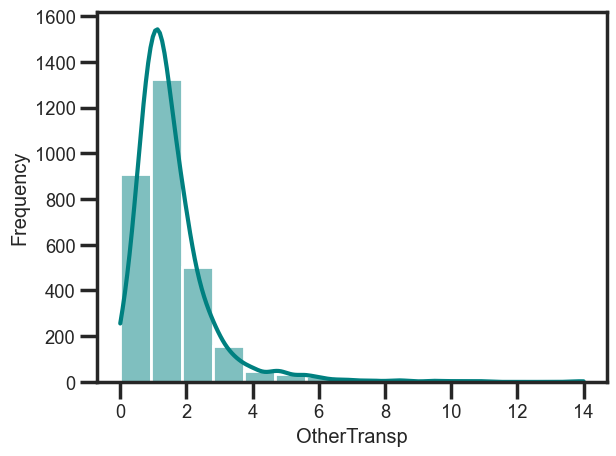

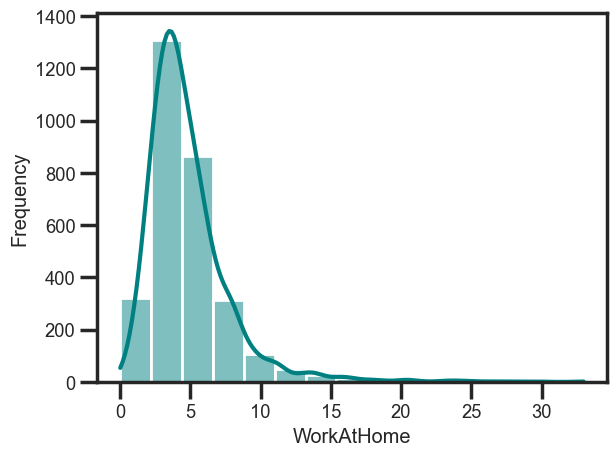

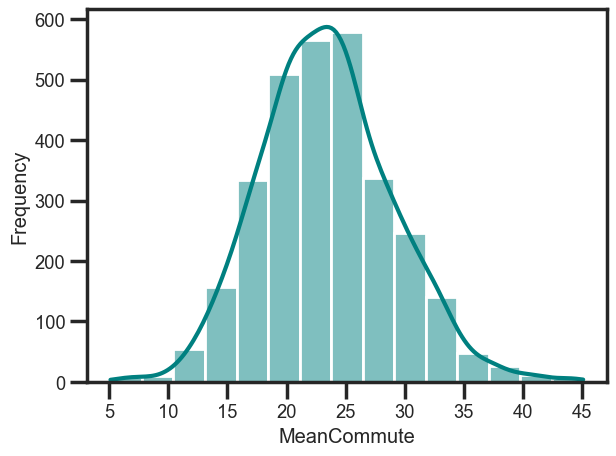

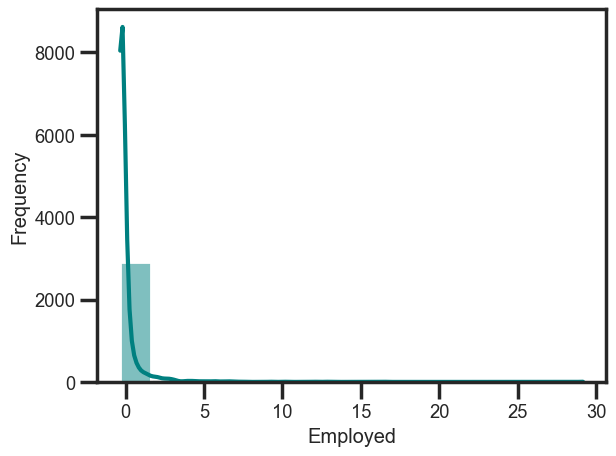

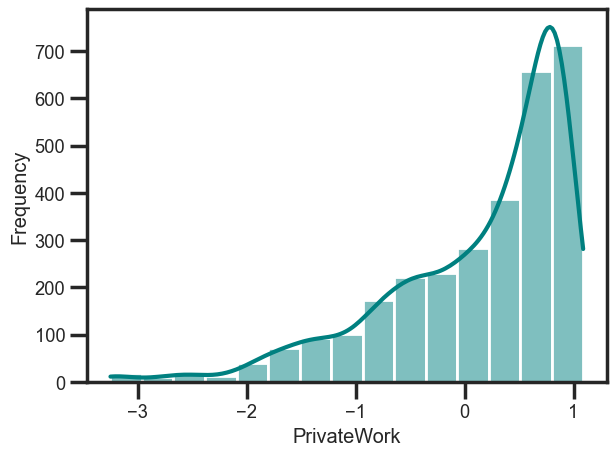

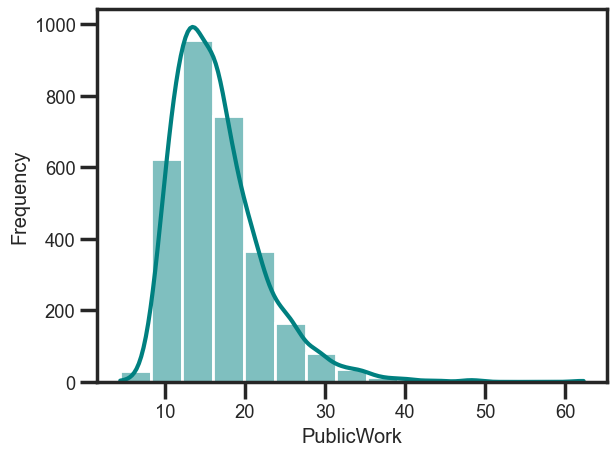

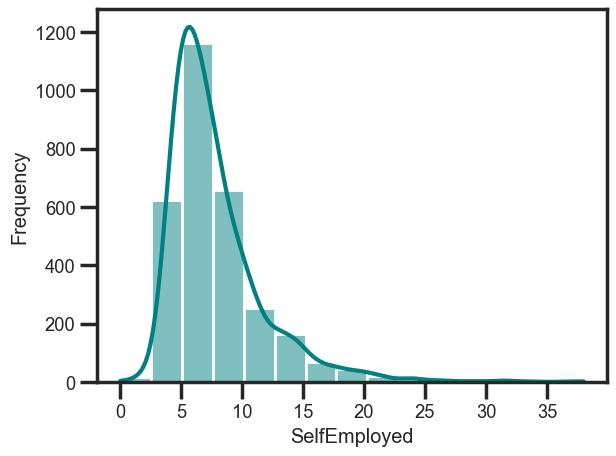

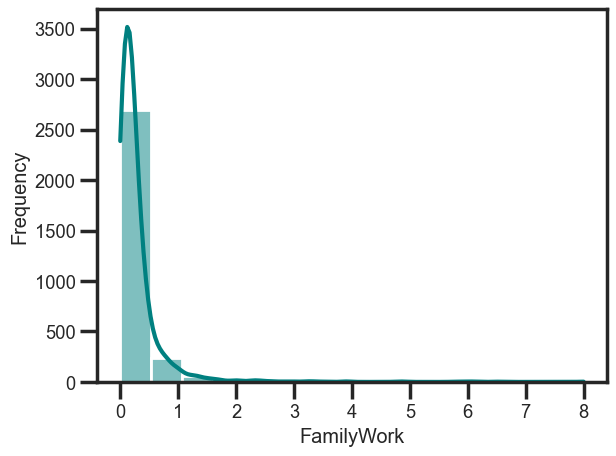

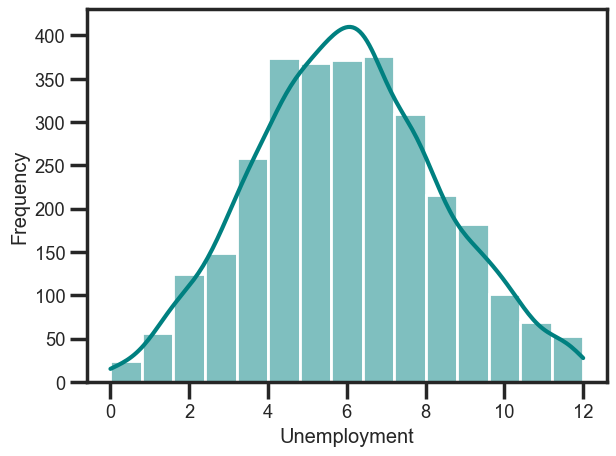

In [160]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(len(Numerical), 1, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

for i in Numerical:
    ax=sns.histplot(x= df[i], color='teal', bins= 15, kde= True, palette= 'twilight')
    ax.set(xlabel= i , ylabel= 'Frequency')
    
    plt.tight_layout()
    plt.show()

### FEATURE-SELECTION

In [146]:
#checking the correlation of each and every variable 
df.corr()

TotalPop       Men     Women  Hispanic     White     Black  \
TotalPop          1.000000  0.999880  0.999888  0.177455  0.997912  0.101210   
Men               0.999880  1.000000  0.999537  0.178505  0.997785  0.098280   
Women             0.999888  0.999537  1.000000  0.176402  0.997807  0.104012   
Hispanic          0.177455  0.178505  0.176402  1.000000  0.168608 -0.101327   
White             0.997912  0.997785  0.997807  0.168608  1.000000  0.096623   
Black             0.101210  0.098280  0.104012 -0.101327  0.096623  1.000000   
Native           -0.049539 -0.049268 -0.049789 -0.039692 -0.050462 -0.099584   
Asian             0.450347  0.451410  0.449220  0.115920  0.464578  0.037049   
Pacific           0.028517  0.029452  0.027610  0.013622  0.028108 -0.033550   
VotingAgeCitizen  0.245932  0.246880  0.244961 -0.030895  0.266426 -0.206725   
Income           -0.241423 -0.240989 -0.241787  0.064717 -0.239071 -0.102022   
IncomeErr         0.251575  0.250836  0.252231 -0.125922  0.275378 -0.198708   
IncomePerCap     -0.247045 -0.246818 -0.247208  0.014162 -0.244425 -0.110560   
IncomePerCapErr  -0.132046 -0.130052 -0.133938 -0.089848 -0.139572  0.175007   
Poverty          -0.053415 -0.054359 -0.052493  0.227749 -0.068479  0.384787   
ChildPoverty     -0.046441 -0.047604 -0.045308  0.191477 -0.062068  0.422873   
Professional      0.256566  0.255348  0.257682 -0.068083  0.276327 -0.090094   
Service           0.006801  0.006903  0.006702  0.137609 -0.005941  0.132103   
Office            0.182172  0.181406  0.182869 -0.002161  0.175868  0.160398   
Construction     -0.271804 -0.270036 -0.273447  0.212972 -0.279047 -0.179570   
Production       -0.194081 -0.193641 -0.194461 -0.162153 -0.199881  0.063785   
Drive             0.200153  0.199136  0.201089 -0.106655  0.203507  0.066668   
Carpool          -0.070694 -0.069159 -0.072158  0.173469 -0.076309 -0.022216   
Transit           0.401656  0.395686  0.407321  0.107033  0.412757  0.100444   
Walk             -0.043566 -0.043953 -0.043183 -0.025611 -0.038731 -0.189686   
OtherTransp       0.065925  0.066371  0.065480  0.063340  0.066520  0.051722   
WorkAtHome       -0.013411 -0.013087 -0.013721 -0.057504 -0.007751 -0.296343   
MeanCommute       0.167380  0.166341  0.168343 -0.065923  0.167214  0.227849   
Employed          0.996747  0.996241  0.997008  0.165438  0.995575  0.108411   
PrivateWork      -0.263179 -0.262357 -0.263912 -0.688104 -0.255411 -0.561609   
PublicWork       -0.144590 -0.143553 -0.145557  0.139976 -0.149325  0.138097   
SelfEmployed     -0.148168 -0.147838 -0.148452 -0.004139 -0.147417 -0.310729   
FamilyWork       -0.082108 -0.081901 -0.082288 -0.041343 -0.081904 -0.137136   
Unemployment      0.077260  0.076293  0.078174  0.075904  0.061088  0.400759   

                    Native     Asian   Pacific  VotingAgeCitizen  ...  \
TotalPop         -0.049539  0.450347  0.028517          0.245932  ...   
Men              -0.049268  0.451410  0.029452          0.246880  ...   
Women            -0.049789  0.449220  0.027610          0.244961  ...   
Hispanic         -0.039692  0.115920  0.013622         -0.030895  ...   
White            -0.050462  0.464578  0.028108          0.266426  ...   
Black            -0.099584  0.037049 -0.033550         -0.206725  ...   
Native            1.000000  0.005528  0.023903         -0.040672  ...   
Asian             0.005528  1.000000  0.396664          0.453978  ...   
Pacific           0.023903  0.396664  1.000000          0.063772  ...   
VotingAgeCitizen -0.040672  0.453978  0.063772          1.000000  ...   
Income            0.043982 -0.164932  0.039627          0.019092  ...   
IncomeErr        -0.054575  0.420291  0.073921          0.873615  ...   
IncomePerCap      0.027381 -0.182727  0.063180         -0.045665  ...   
IncomePerCapErr  -0.195515 -0.308501 -0.156302         -0.183586  ...   
Poverty           0.126801 -0.143035 -0.029528         -0.745699  ...   
ChildPoverty      0.109393 -0.170940 -0.026808   

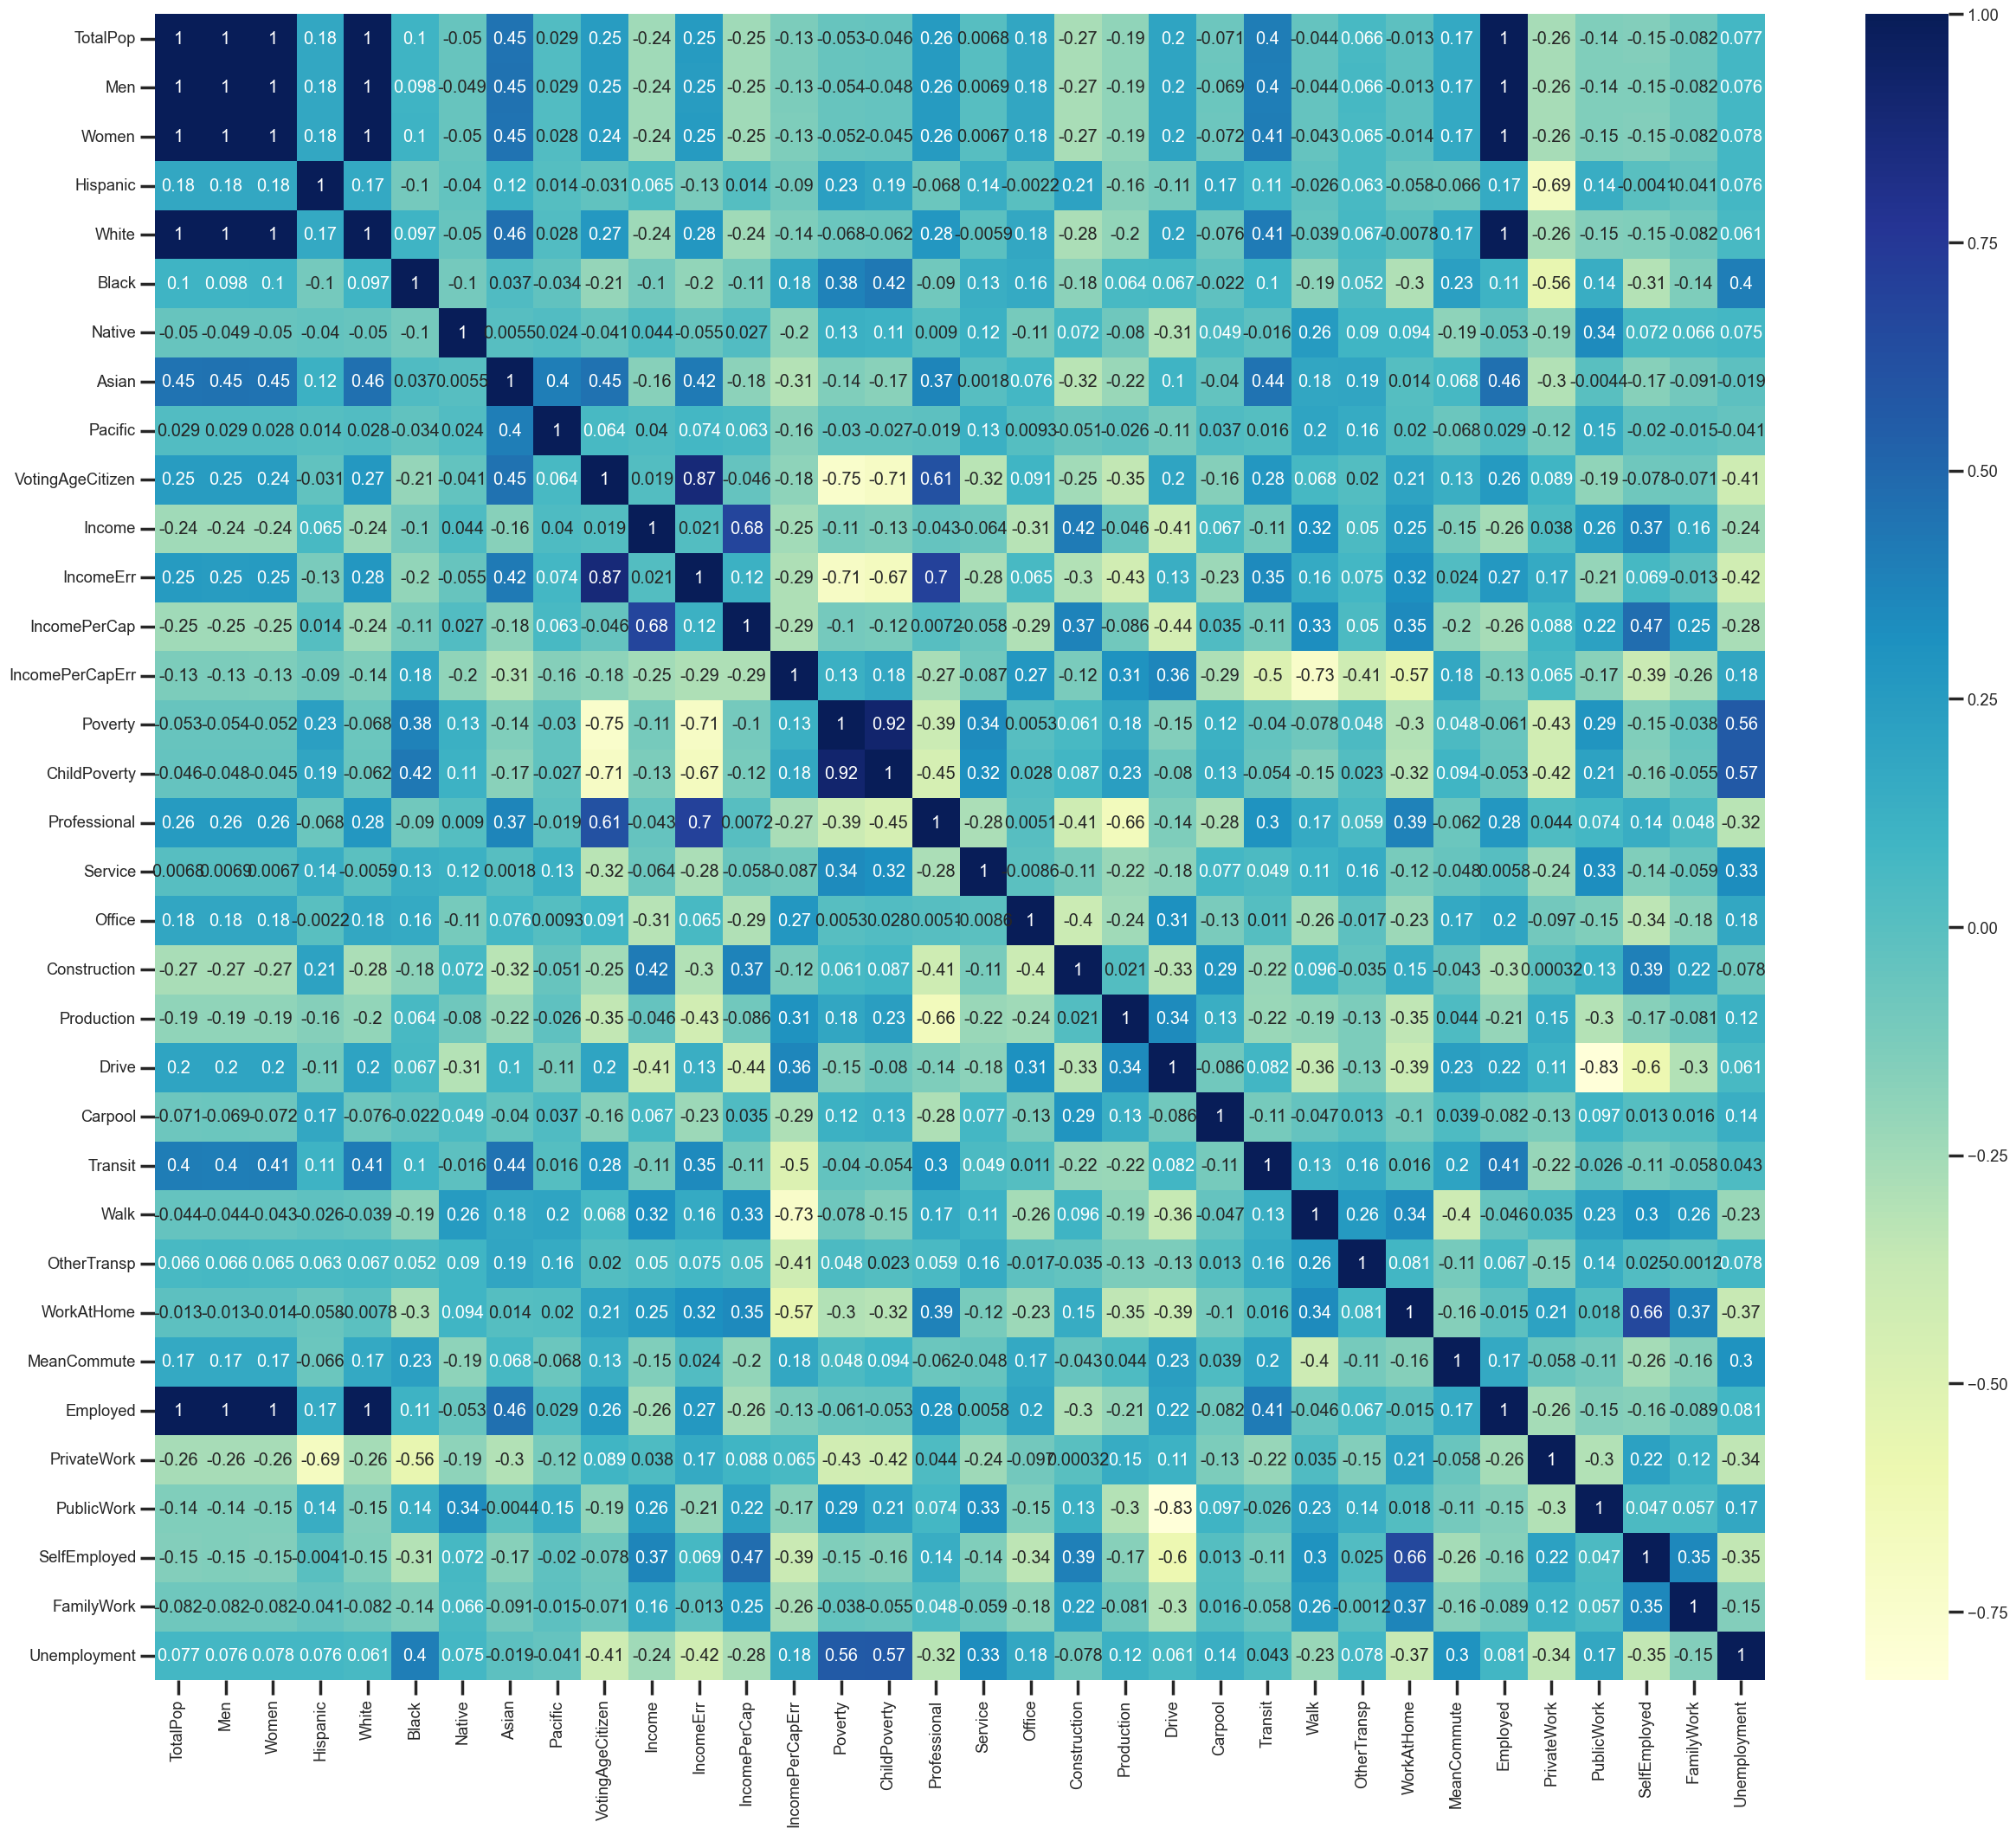

In [147]:
#It's the same thing in a map form
plt.figure(figsize=(30, 25))
dataplot = sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True)

In [148]:
# --- Feature Selection ---

# Calculate the correlation matrix
corr_matrix = df.corr()

# Find the highly correlated features
features = []

for feature, value in corr_matrix['Unemployment'].iteritems():
    if (abs(value) >= 0.4) and (feature != 'Unemployment'):
        features.append(feature)

In [183]:
features

['Black', 'VotingAgeCitizen', 'IncomeErr', 'Poverty', 'ChildPoverty']

### MODEL TRAINING

In [163]:
# Separate the independent variables (X) from the dependent variable (y)

X = df[features] # Independent variables
y = df['Unemployment'] # Dependent variable

In [164]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=1/4, random_state = 10)

In [165]:
#checking the division of dataset into test and train
print(len(X_train))
print(len(X_test))

2274
758


In [166]:
# Create an instance of the LinearRegression class
lr = LinearRegression()

# Fit the model to your data
lr.fit(X_train, y_train)

# Predict the dependent variable (y) using the independent variables (X)
y_pred = lr.predict(X_test)

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

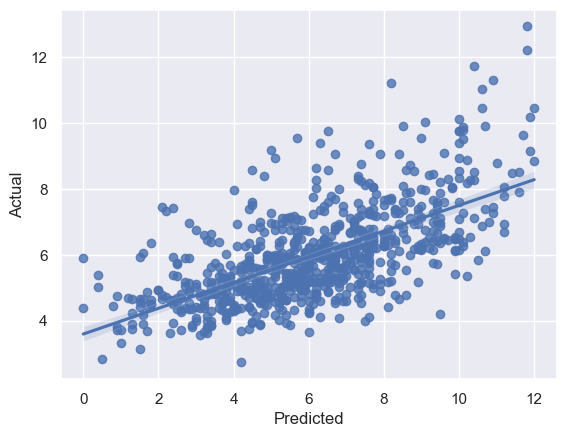

In [171]:
sns.set_theme(style="darkgrid")
reg_plot = sns.regplot(y_test, y_pred)
reg_plot.set(xlabel='Predicted', ylabel='Actual')

In [172]:
#Evaluate the performance of the model
#R-squared value is the accuracy of the model
print("R2 Score:", r2_score(y_test, y_pred))

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

R2 Score: 0.409868377021682
Mean Squared Error:  3.353122943491621
Mean Absolute Error:  1.4497777132389464


In [173]:
print(lr.intercept_, lr.coef_, lr.score(X,y))

3.0117053524364135 [ 0.03523254  0.30338454 -0.38369246  0.09645951  0.05435044] 0.37038650566952025
